# Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree 
from os import system
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

# Import Data

In [2]:
data=pd.read_csv("vehicle.csv")
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
data.shape

(846, 19)

In [4]:
cleanup = {"class":     {"van":1,"car":2,"bus":3} }
data.replace(cleanup, inplace=True)


In [5]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      1  
1             189.0            199      1  
2             188.0            196      2  
3             199.0            207      1  
4             180.0            183      3

In [6]:
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        845.000000     846.000000  846.000000  
mean         188.919527     195.632388    2.022459  
std            6.155809       7.438797    0.702130  
min          176.000000     181.000000    1.000000  
25%          184.000000     190.250000    2.000000  
50%          188.000000     197.000000    2.000000  
75%          193.000000     201.000000    3.000000  
max          206.000000     211.000000    3.000000

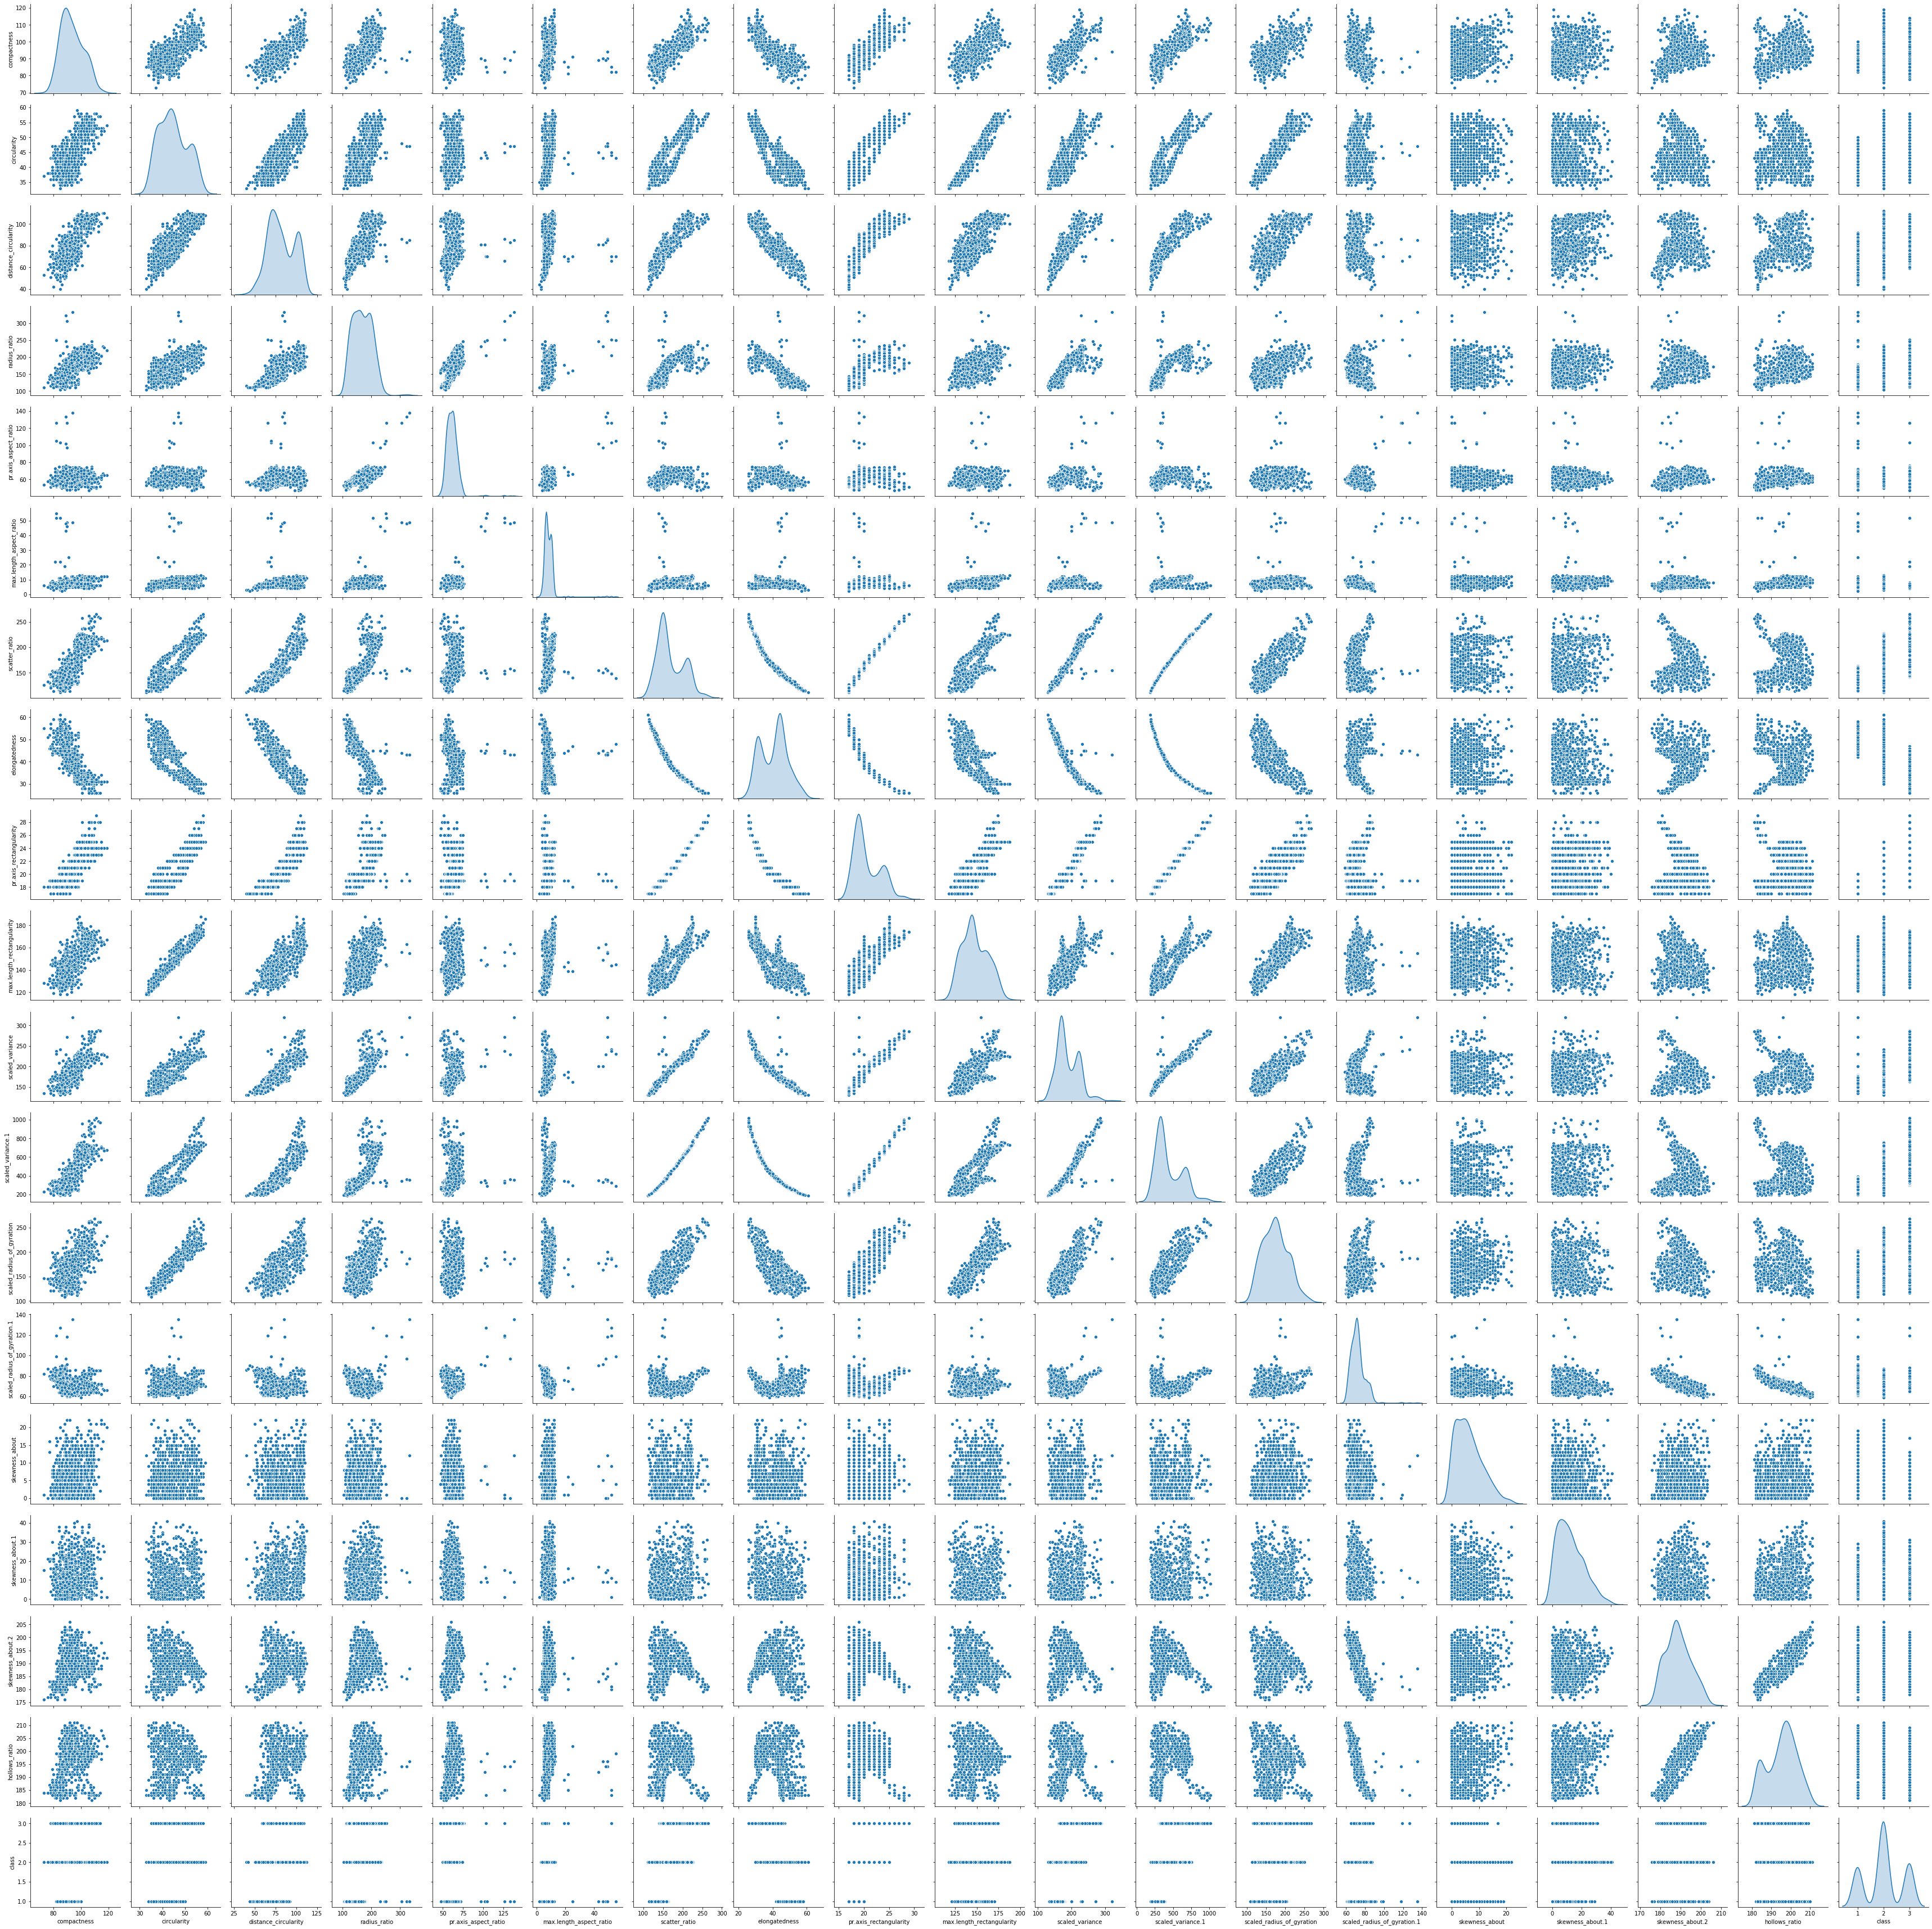

In [131]:
sns.pairplot(data, diag_kind='kde') 

# EDA

In [7]:
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int64
dtype: object

In [8]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
cleanup = {"class":     {"car":1,"van":2,"bus":3}

SyntaxError: unexpected EOF while parsing (<ipython-input-9-69d863923793>, line 1)

In [10]:
data.replace(cleanup, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [11]:
data=data.fillna(data.mean().iloc[0])

Fill in the missing variables with the mean of the column.

In [12]:
x = data[data.columns[1:-1]]
y = data["class"]

In [13]:
from scipy.stats import zscore
XScaled=x.apply(zscore)
XScaled.head()

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0     0.401276              0.053001      0.283914              1.276010   
1    -0.573197              0.116487     -0.805198             -0.592152   
2     0.679697              1.513170      1.196414              0.528745   
3    -0.573197             -0.010484     -0.275360              0.155112   
4    -0.155566             -0.772312      1.078672              5.136878   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                 0.311542      -0.204737       0.125263   
1                 0.094079      -0.595408       0.499583   
2                 0.311542       1.147585      -1.122469   
3                 0.094079      -0.745666       0.624356   
4                 9.444962      -0.595408       0.499583   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0               -0.166439                   0.758332        -0.386118   
1               -0.364193                  -0.344578        -0.574555   
2                0.426821                   0.689401         1.089969   
3               -0.364193                  -0.344578        -0.888616   
4               -0.364193                  -0.275646         1.655280   

   scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0          -0.336868                   0.289397                    -0.335068   
1          -0.613468                  -0.504153                    -0.072076   
2           1.108225                   1.388158                     0.059420   
3          -0.732010                  -1.450309                    -1.255540   
4          -0.641692                   0.411481                     7.160202   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  
0       -0.111579          0.353127         -0.259426       0.183957  
1        0.228763          0.139227          0.027717       0.452977  
2        0.795999         -0.395523         -0.115855       0.049447  
3       -0.111579         -0.288573          1.463429       1.529056  
4        0.228763         -0.181623         -1.264424      -1.699181

I tried to create an SVM model without scaling.That resulted in a very poor perfoming model. Hence I have scaled the values.

In [14]:
print(np.where(XScaled>3))

(array([  4,   4,   4,   5,  19,  37,  37,  37,  37,  66,  70,  85, 100,
       100, 100, 105, 105, 118, 132, 135, 135, 135, 135, 141, 177, 215,
       222, 222, 237, 249, 266, 273, 285, 291, 291, 321, 321, 388, 388,
       388, 388, 388, 391, 396, 396, 523, 523, 687, 687, 706, 706, 706,
       733, 835, 835], dtype=int64), array([ 3,  4, 12,  0,  3,  2,  3,  4, 12, 13,  7, 10,  3,  4, 12,  0, 14,
        0, 14,  2,  3,  4, 12, 13, 13,  6,  3, 13,  7, 13,  0,  7, 13,  3,
        4,  9, 10,  2,  3,  4,  9, 12,  4,  0,  9,  3,  4,  9, 10,  3,  4,
       12,  9,  9, 10], dtype=int64))


In [15]:
data = data[(XScaled < 3).all(axis=1)]

In [40]:
Finding the presence of outliers and replacing outliers with a sd of 3<

SyntaxError: invalid syntax (<ipython-input-40-9daaafa81e8f>, line 1)

In [16]:
data.shape

(815, 19)

In [17]:
x = data[data.columns[1:-1]]
y = data["class"]

In [18]:
XScaled=x.apply(zscore)
XScaled.head()

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0     0.531430              0.060853      0.327307              1.913704   
1    -0.613081              0.124439     -0.812551             -0.755743   
2     0.858433              1.523332      1.282324              0.845925   
3    -0.613081             -0.002733     -0.258025              0.312036   
6    -0.286078             -0.575008      0.173272              0.667962   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                 0.813403      -0.194234       0.127694   
1                 0.366086      -0.594449       0.514574   
2                 0.813403       1.191127      -1.161905   
3                 0.366086      -0.748378       0.643533   
6                -0.975864      -0.471306       0.127694   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0               -0.213366                   0.776774        -0.371384   
1               -0.610382                  -0.328906        -0.570462   
2                0.977682                   0.707669         1.188065   
3               -0.610382                  -0.328906        -0.902260   
6               -0.610382                  -0.328906        -0.371384   

   scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0          -0.328957                   0.319010                    -0.317176   
1          -0.614422                  -0.492461                    -0.004609   
2           1.162451                   1.442585                     0.151674   
3          -0.736764                  -1.459985                    -1.411159   
6          -0.433822                  -0.055515                    -0.942309   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  
0       -0.077603          0.378549         -0.279147       0.160596  
1        0.528591          0.154661          0.007622       0.432424  
2        1.538913         -0.405059         -0.135763       0.024681  
3       -0.077603         -0.293115          1.441465       1.519739  
6        1.336848         -1.300611          1.584849       1.111996

# Splitting the Data

In [19]:
x_train,x_test,y_train,y_test = train_test_split(XScaled,y,test_size=0.30,random_state=4)
y_train.head()

272    1
729    2
651    2
148    2
745    3
Name: class, dtype: int64

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=4)
y_train.head()

272    1
729    2
651    2
148    2
745    3
Name: class, dtype: int64

# SVM

In [21]:
clf = svm.SVC(gamma=0.1, C=1)

I found gamma=0.1 and C=1 very optimal

In [22]:
clf.fit(x_train , y_train.values.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred = clf.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.9551020408163265

96 is an excellent score. The model has performed extremely well.

# PCA

In [25]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.0012285   0.7974397   0.63062947  0.22549692  0.54439822  0.85843898
  -0.8249883   0.85699432  0.96743211  0.8120397   0.83885803  0.9336075
   0.02082872  0.14787264 -0.0114865  -0.05461448  0.06803039]
 [ 0.7974397   1.0012285   0.78801987  0.26515633  0.63215244  0.91121427
  -0.91159619  0.90071054  0.77462123  0.88316301  0.88504816  0.69970255
  -0.28264544  0.11142655  0.2641076   0.14770886  0.35478695]
 [ 0.63062947  0.78801987  1.0012285   0.66659631  0.44132687  0.77935655
  -0.82628105  0.7531148   0.56750309  0.77895682  0.75855176  0.54384807
  -0.41612827  0.04678706  0.19028579  0.38028239  0.51360091]
 [ 0.22549692  0.26515633  0.66659631  1.0012285   0.16503049  0.23596149
  -0.33052009  0.20345439  0.17072862  0.2532059   0.22180325  0.19170131
  -0.30311435 -0.05439036 -0.02695329  0.35884753  0.40217325]
 [ 0.54439822  0.63215244  0.44132687  0.16503049  1.0012285   0.49263
  -0.49312588  0.49251434  0.62395477  0.42204025  0.45051988  0.40745826
  -0.3040574

In [26]:
 pca = PCA(n_components=17)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
print(pca.explained_variance_)


[9.11631029e+00 3.05797198e+00 1.19974821e+00 1.12749824e+00
 8.52257475e-01 6.39847857e-01 3.46788704e-01 2.51114493e-01
 1.08683438e-01 8.22409267e-02 7.45078641e-02 6.04402485e-02
 4.26938548e-02 2.81020353e-02 1.64929171e-02 1.32965409e-02
 2.88943925e-03]


In [28]:
print(pca.components_)

[[-2.99759467e-01 -3.12254806e-01 -2.77745545e-01 -1.15067965e-01
  -1.98205860e-01 -3.22277818e-01  3.20236059e-01 -3.18946842e-01
  -2.87872903e-01 -3.13039849e-01 -3.15795831e-01 -2.73170322e-01
   5.92223151e-02 -3.77934303e-02 -6.16421243e-02 -4.32755910e-02
  -9.49171001e-02]
 [ 1.39448877e-01 -4.92989160e-02 -2.11415126e-01 -2.62124198e-01
  -8.81384663e-02  6.78013257e-02 -7.24423704e-03  8.14471682e-02
   1.26609391e-01  6.69978244e-02  7.43645866e-02  2.08995325e-01
   5.13702259e-01 -3.13787614e-02 -1.06232064e-01 -4.79842530e-01
  -5.19162904e-01]
 [-2.05026113e-01  7.27848600e-02  4.50672090e-02 -1.06611160e-01
  -1.16072627e-01  1.07169656e-01 -9.03597285e-02  1.06249917e-01
  -2.08232961e-01  1.27027891e-01  1.10049739e-01 -2.24424570e-01
   6.48265829e-02 -5.30579925e-01  6.89800127e-01 -1.00148353e-01
  -3.62176074e-02]
 [ 2.46007036e-04 -1.20080314e-01  2.43613356e-01  5.91602181e-01
  -3.06734469e-01 -7.28662672e-04 -6.63764542e-02 -2.75631320e-02
  -7.97994431e-02  

In [29]:
print(pca.explained_variance_ratio_)

[5.35595567e-01 1.79659992e-01 7.04868310e-02 6.62420475e-02
 5.00712800e-02 3.75919275e-02 2.03743057e-02 1.47533163e-02
 6.38529909e-03 4.83176574e-03 4.37743785e-03 3.55094639e-03
 2.50832175e-03 1.65103260e-03 9.68981202e-04 7.81189772e-04
 1.69758466e-04]


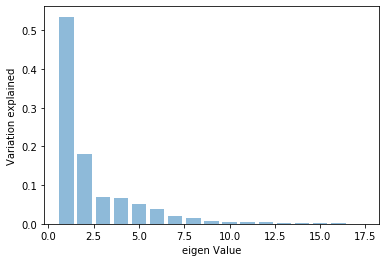

In [30]:
plt.bar(list(range(1,18)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

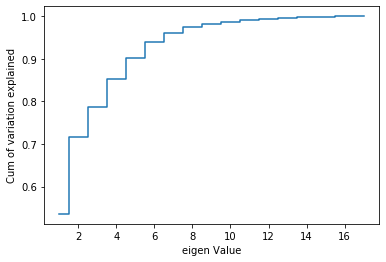

In [31]:
plt.step(list(range(1,18)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# My Observations:
I have observed that 9 components capture 95% of the variance.

# Dimentionality Reduction

In [32]:
pca = PCA(n_components=9)
pca.fit(XScaled)
print(pca.components_)
print(pca.explained_variance_ratio_)
Xpca = pca.transform(XScaled)

[[-2.99759467e-01 -3.12254806e-01 -2.77745545e-01 -1.15067965e-01
  -1.98205860e-01 -3.22277818e-01  3.20236059e-01 -3.18946842e-01
  -2.87872903e-01 -3.13039849e-01 -3.15795831e-01 -2.73170322e-01
   5.92223151e-02 -3.77934303e-02 -6.16421243e-02 -4.32755910e-02
  -9.49171001e-02]
 [ 1.39448877e-01 -4.92989160e-02 -2.11415126e-01 -2.62124198e-01
  -8.81384663e-02  6.78013257e-02 -7.24423704e-03  8.14471682e-02
   1.26609391e-01  6.69978244e-02  7.43645866e-02  2.08995325e-01
   5.13702259e-01 -3.13787614e-02 -1.06232064e-01 -4.79842530e-01
  -5.19162904e-01]
 [-2.05026113e-01  7.27848600e-02  4.50672090e-02 -1.06611160e-01
  -1.16072627e-01  1.07169656e-01 -9.03597285e-02  1.06249917e-01
  -2.08232961e-01  1.27027891e-01  1.10049739e-01 -2.24424570e-01
   6.48265829e-02 -5.30579925e-01  6.89800127e-01 -1.00148353e-01
  -3.62176074e-02]
 [ 2.46007036e-04 -1.20080314e-01  2.43613356e-01  5.91602181e-01
  -3.06734469e-01 -7.28662672e-04 -6.63764542e-02 -2.75631320e-02
  -7.97994431e-02  

In [33]:
Xpca

array([[-0.61205981, -0.63735077, -0.45608274, ..., -0.62091924,
         0.17504565,  0.15156374],
       [ 1.46670615, -0.33977211, -0.19041305, ...,  0.15980047,
        -0.13676863, -0.07841061],
       [-3.77297345,  0.33100492, -1.1210706 , ...,  0.73781099,
        -0.03269409, -0.48993397],
       ...,
       [-4.96904717, -0.02093443, -0.47287204, ...,  0.73894367,
        -0.00974237,  0.73374263],
       [ 3.1290783 , -1.1343616 ,  1.89521999, ..., -0.22556335,
         0.4892118 , -0.96080774],
       [ 4.84877727,  0.33514006,  1.27325603, ..., -0.43534721,
         0.42975093, -0.15428137]])

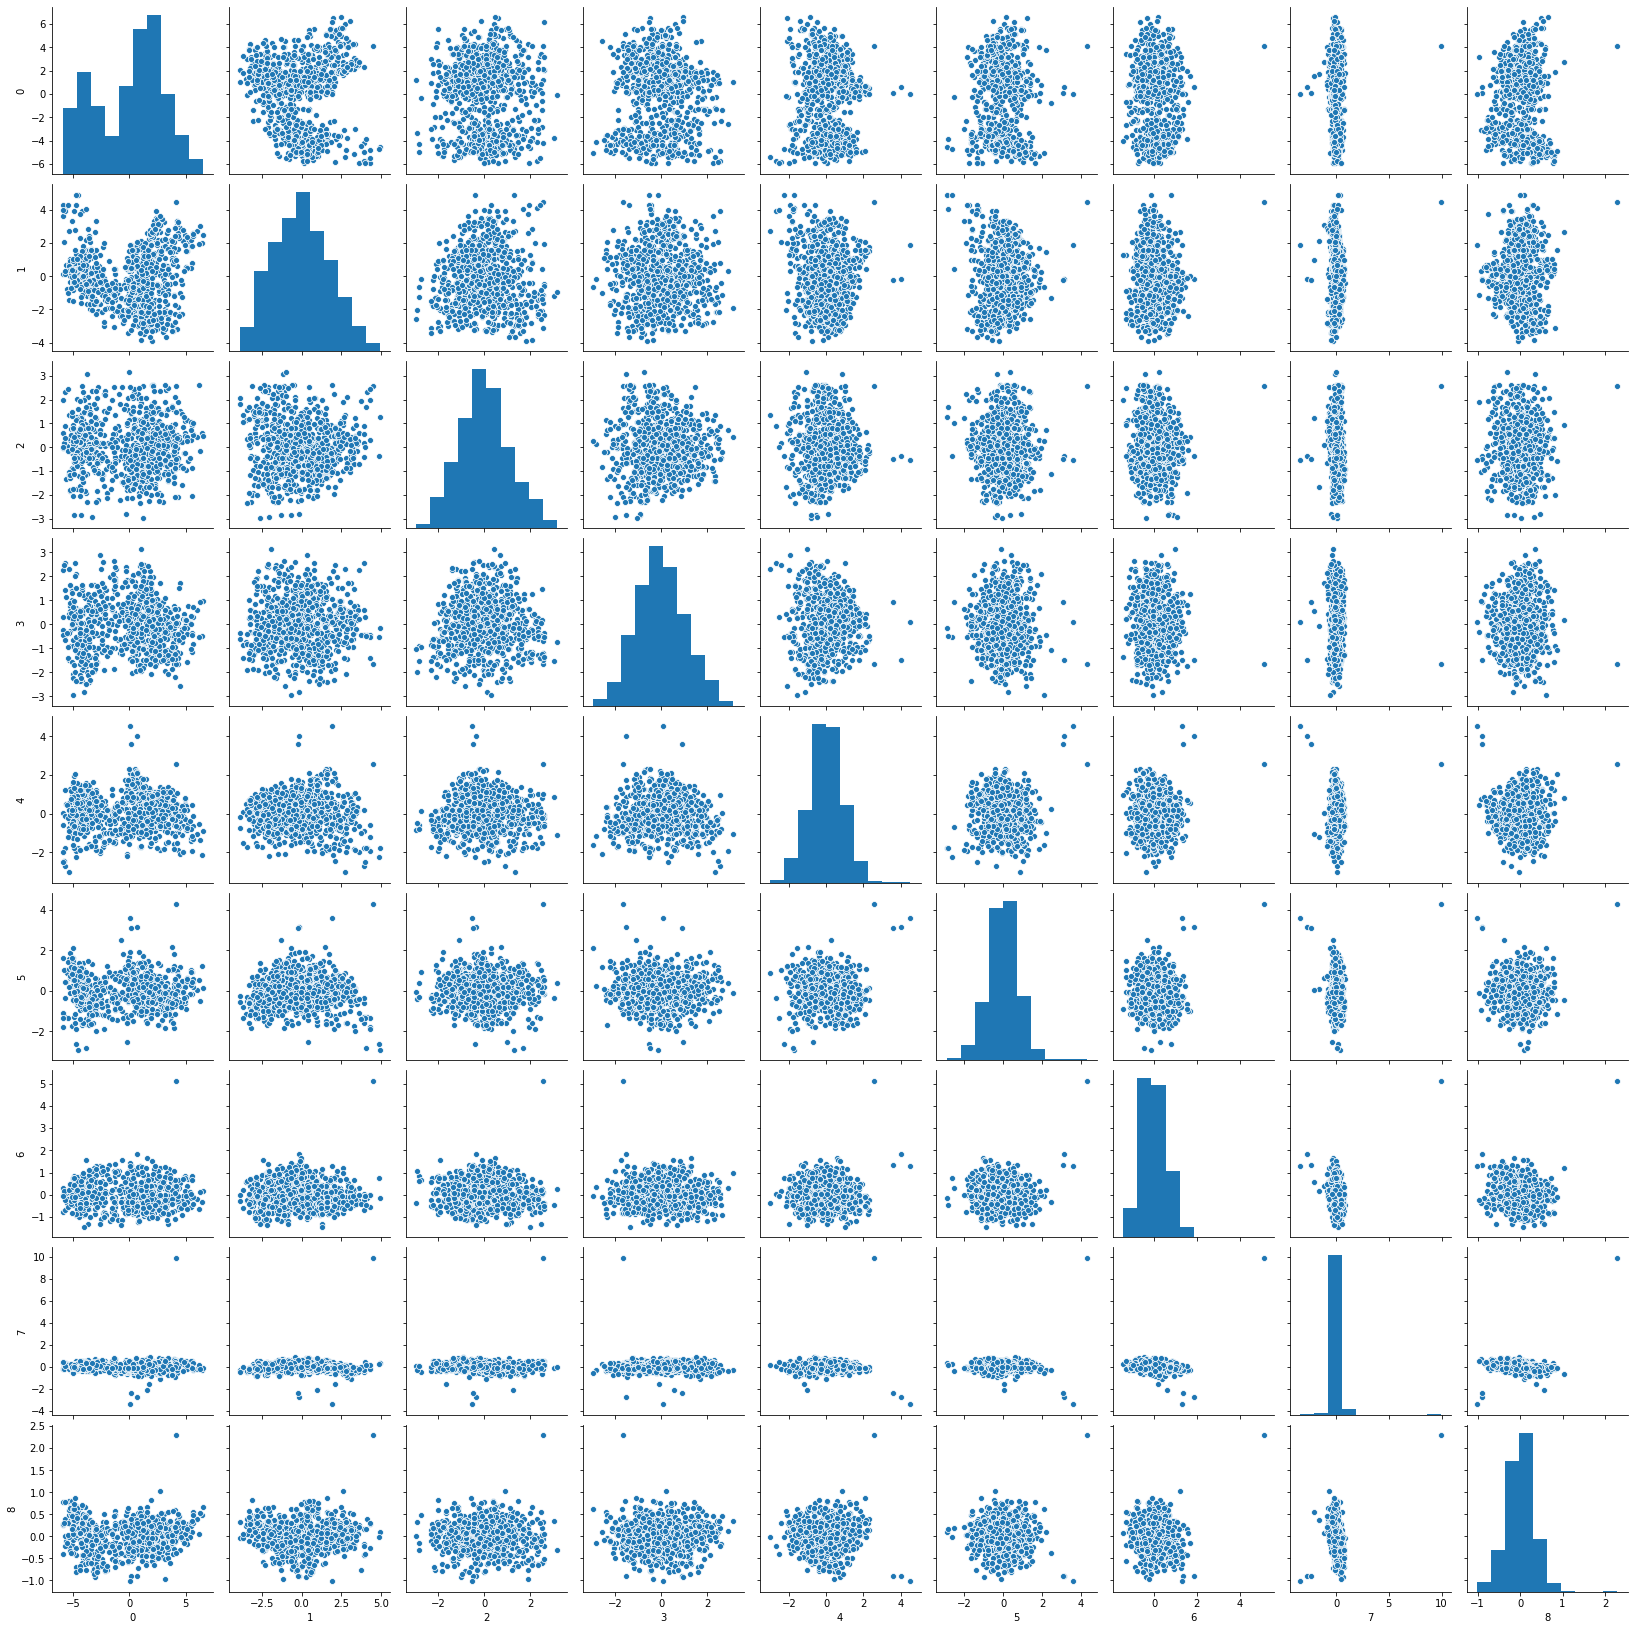

In [35]:
sns.pairplot(pd.DataFrame(Xpca))

# Linear Regression

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train.values.ravel())
y_predict=model.predict(X_test)

C:\Users\Jean.DESKTOP-0D64KCL.000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
model_score=model.score(X_test,Y_test)
print("Model Accuracy=",model_score)

Model Accuracy= 0.9061224489795918


In [38]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
regression_model.score(x_train, y_train)

0.6551587406181385

In [39]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca, y)
regression_model_pca.score(Xpca, y)

0.4361140633255439

# My Observations

SVM model has performed extremely well on this problem. It has a accuracy greater than 95+. PCA however, the model has performed very poorly. I have dropped 10 coloumns reducing the score by almost 22%. The Linear Regression does'nt seem to perform well in this problem. SVM is the best way to go.